# Phonon Dispersion Relations

Here I will model the dispersion relation of various crystal lattices by assuming that each crystal atom is coupled with its neighboring atoms by a spring. Hence, the collective motion of atoms leads to a well-defined traveling wave over the whole system, leading to the collective motion, also called phonon. The equation of motion of the atoms around thermal equilibrium position will be solved using several methods, which include numerical calculation on the eigenvalue problem

From the dispersion relation, one can easily calculate many useful properties of the crystal, suchas thedensity of states,specific heat capacity, elasticity, and thermal conductivity. I will derive and numerically approximate the dispersion relation for six different types of crystals. The six types are:
1. One-dimensional chain with atoms of the same mass and the same spring constant (monatomic chain).
2. One-dimensional chain with atoms of different masses and the same spring constant (diatomic chain).
5. Two-dimensional lattice with atoms of same mass and same spring constant.
6. Three-dimensional simple cubic lattice with atoms of the same mass.

**Case 1: 1-D monatomic chain with spring constant C and mass M**

Themonatomic chainmodel represents a crystal in one dimensions where all atoms are identical, equally spaced in equilibrium and connected by bonds of equal strength. The mass of an atom is $m$, the spring constant, $C$, describes the strength of the bond between atoms, and we enumerate the atoms along the chain using the variables $s$ as a counter. The coordinate of atomnalong the chain is $x_{s}$, as illustrated by the figure below:


<img src="1d_lattice.jpg" alt="1d_lattice" width="600"/>


The force $F_{n}$ acting on an atom $s$ at any given moment is the product of its mass an acceleration:

$$F_{s} = m \frac{d^{2}x_{s}}{dt^{s}}$$

If we assume the displacement of the atoms is elastic, we can apply [Hooke's law](https://en.wikipedia.org/wiki/Hooke's_law) to express the force as the displacement multiplied by the spring constant $C$. Since the neighbouring atoms $s-1$and $s+1$ are also displaced from their equilibrium position, we need to consider the relative displacement between the pairs:

$$C(x_{s-1} - x_{s} + C(x_{s+1} - x_{s}) = C(x_{s-1} + x_{s+1} - 2x_{s})$$

This only works under the assumption that there are no long-range interactions between atoms that are not immediately next to each other. If we assume $x_{s}$ takes the form of a wave, with time and angular frequency $\omega$:

$$x_{s} = Ae^{-i\omega t}$$

Differentiating this twice, and plugging into Newton's equation, we obtain

$$-m\omega ^{2}x_{s} = C(x_{s+1} + x_{s-1} - 2x_{s})$$

In addition, we can represent the oscillation of the atoms in the chain at a given moment as a wave in space with a wave number $k$ to obtain

$$x_{s} = Ae^{iksa}$$

where $a$ is the equilibrium lattice spacing between the atoms. Substituting into the equation above, we obtain

$$-m\omega ^{2}e^{iksa} = C(e^{ik(s+a)a} + e^{ik(s-a)a} - 2e^{iksa}) = Ce^{iksa}(e^{ika} + e^{-ika} - 2)$$

Using [Euler's formula](https://en.wikipedia.org/wiki/Euler%27s_formula), we obtain 

$$-m\omega ^{2} = 2C(cos(ka)-1)$$

Using the identity

$$1 - cos(ka) = 2sin^{2}(\frac{ka}{2})$$

We obtain

$$\omega (k) = 2 \sqrt\frac{C}{M}|sin(\frac{ka}{2})|$$

Which is the dispersion relation for the monatomic chain.


In [429]:
from math import*
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy.integrate as integrate

Text(0, 0.5, 'frequency (normalised)')

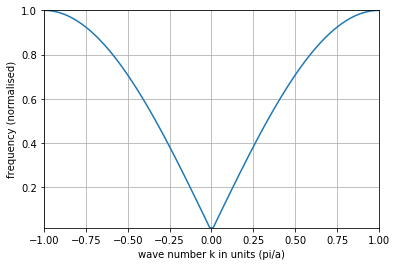

In [430]:
#calculating and plotting dispersion relation for case 1 in first Brillouin zone

M, C, a = 1, 1, 1                                   #set constants to 1 for simplicity
k = np.linspace(-pi/a, pi/a, num = 100)             #initialise wave number vector
omega = np.sqrt((4*C)/M)*np.abs(np.sin(0.5*k*a))    #calculate omega
omega_n = omega/sqrt(4*C/M)                         #normalise omega for plotting
k_n = k/(pi/a)                                      #normalise k
plt.plot(k_n, omega_n)
plt.margins(0,0)
plt.grid()
plt.xlabel('wave number k in units (pi/a)')
plt.ylabel('frequency (normalised)')

**Case 2: 1-D diatomic chain with spring constant C and different masses, M and m**

The one-dimensional diatomic chain model represents central lattices, where more than one atom is present in the unit cell. To preserve generality, we distinguish the two atoms and assign different masses to them. The positions of the two atom times are denoted by $u$ and $v$, and their masses by $M$ and $m$ respectively. We assume the spring constant, $C$, is equal for all bonds. Instead of atoms, the variable $s$ is now used to count unit cells, and the lattice parameter $a$ is now the distance between two identical atoms. The figure below illustrates this chain, where the positions $u$ and $v$ are shown in red and blue, respectively:

<img src="1d_lattice_2m.jpg" alt="1d_lattice_2m" width="600"/>

Similar to the monatomic chain, we are only concerned with the forces acting on the atoms as a consequence of relative displacements between neighbours, taking into account that neighbours are of different mass and type. For the red atom of mass $M$, the force is denoted by $F_{u}$, similarly, for the blue atoms, the force is $F_{v}$. Writing the equation of motion for both, we obtain the system:

$$F_{u} = M\frac{d^{2}u_{s}}{dt^{2}} = C(v_{s} + v_{s-1} - 2u_{s})$$
and
$$F_{v} = M\frac{d^{2}v_{s}}{dt^{2}} = C(u_{s+1} + u_{s} - 2v_{s})$$

imilar to the monatomic case, we make the assumption that the displacement of both atoms can be described by waves in space and time, we use the ansatz:

$$u_{s} = ue^{iska-i\omega t}$$ and $$v_{s} = ve^{iska-i\omega t}$$

Differentiating both twice and substituting into the system of Newton equations and simplfying, one obtains the following system of equations

$$(2C-\omega ^{2}M)u - C(1+e^{-ika})v = 0$$
and
$$(2C-\omega ^{2}m)v - C(1+e^{-ika})u = 0$$

The equation has a non-trivial solution when the determinant is equal to zero, that is

$$det\begin{bmatrix}
(2C-\omega ^{2}M) & - C(1+e^{-ika})\\ 
- C(1+e^{-ika}) & (2C-\omega ^{2}m)
\end{bmatrix} = 0$$

which can be solved to obtain (after simplification):

$$\omega (k) = \sqrt{\frac{C(M+m)}{Mm}\pm \sqrt{\frac{(M+m)^{2}}{M^{2}m^{2}}-\frac{4}{Mm}sin^{2}(\frac{ka}{2})}}$$


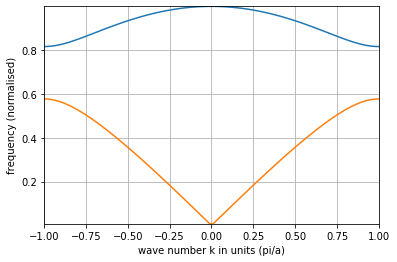

In [431]:
#calculating and plotting dispersion relation for case 2 in first Brillouin zone

M, m, C, a = 1, 2, 1, 5                            #set constants
k = np.linspace(-pi/a, pi/a, num = 100)             #initialise wave number vector
A1 = C*(M+m)/(M*m)
A2 = (((M+m)/(M*m))**2)-((4/(M*m))*(np.sin((k*a)/2)**2))
omega_positive = np.sqrt(A1 + np.sqrt(A2))                      #calculate omega (addition)
omega_negative = np.sqrt(A1 - np.sqrt(A2))                      #calculate omega (subtraction)
omega_positive_n = omega_positive/sqrt(2*C*(M+m)/(M*m))         #normalise omega for plotting
omega_negative_n = omega_negative/sqrt(2*C*(M+m)/(M*m))
k_n = k/(pi/a)                                                  #normalise k
plt.plot(k_n, omega_positive_n, k_n, omega_negative_n)
plt.margins(0,0)
plt.grid()
plt.xlabel('wave number k in units (pi/a)')
plt.ylabel('frequency (normalised)');

**Case 3: 2-D monatomic lattice**

We now consider transverse vibrations of a planar lattice of rows and columns of identical atoms. Letting $u_{l,m}$ denote the displacement normal to the plane of the lattice of the atom in the $lth$ column and the $mth$ row. The mass of each atom is $M$ and $C$ is the spring constant for the nearest neighbor atom, as shown in the figure below.

<img src="2d_lattice.jpg" alt="2d_lattice" width="300"/>



The equation of motion takes the form:

$$M\frac{d^{2}u_{l,m}}{dt^{2}} = C[(u_{l+m,m}+u_{l-m,m}-2u_{l,m}) + (u_{l,m+1}+u_{l,m-1}-2u_{l,m})]$$

Assuming a solution of the form:

$$u_{l,m} = Ae^{i(lk_{x}a+mk_{y}a-\omega t)}$$

Differentiating twice and substituting into Newton's equation, one finds that (after some algebraic manipulation) the dispersion relation is:

$$\omega (k_{x},k_{y}) = \sqrt{ \frac{2C}{M}}\sqrt{2-cos(k_{x}a-cos(k_{y}a)}$$

Using the identity $cos(2x) = 1-2sin^{2}(x)$:

$$\omega (k_{x},k_{y}) = 2 \sqrt{ \frac{C}{M}}\sqrt{sin^{2}(\frac{k_{x}a}{2})+sin^{2}(\frac{k_{y}a}{2})}$$

Hence, the frequency has two components, one in the x-direction and one in the y-direction, given by

$$\omega_{x}= 2 \sqrt{ \frac{C}{M}}\sqrt{sin^{2}(\frac{k_{x}a}{2})} = 2\sqrt{\frac{C}{M}}|sin(\frac{k_{x}a}{2})|$$
and
$$\omega_{y}= 2 \sqrt{ \frac{C}{M}}\sqrt{sin^{2}(\frac{k_{y}a}{2})} = 2\sqrt{\frac{C}{M}}|sin(\frac{k_{y}a}{2})|$$

The dispersion relation has the same form as the one obtained from the primitive 1-D chain (case 1). In fact, it turns out that for any dimension, the dispersion relation for an N-dimensional primitive (monatomic)crystal takes the form:

$$\omega (k_{x_{1}},k_{x_{2}},k_{x_{3}},... k_{x{i}}) = 2\sqrt{\frac{C}{M}}\sqrt{\sum_{i=1}^{N}sin^{2}(\frac{k_{x_{i}}a}{2})}$$



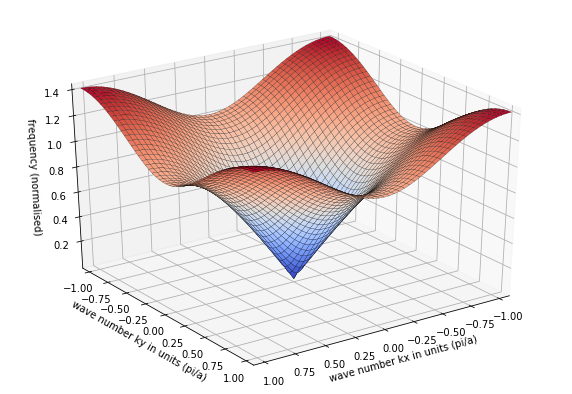

In [432]:
M, C, a = 1, 1, 1                           #set constants
kx = np.linspace(-pi/a, pi/a, num = 500)    #initialise wave number vector in x and y direction
ky = kx
KX, KY = np.meshgrid(kx, ky)
omega = np.sqrt((2*C)/M)*np.sqrt(2-np.cos(KX*a)-np.cos(KY*a))
omega_n = omega/sqrt(4*C/M)
KX_n = KX/sqrt(9*C/M) 
KY_n = KY/sqrt(9*C/M) 
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(KX_n, KY_n, omega_n, cmap=cm.coolwarm, antialiased=True, edgecolors='k', linewidth = 0.2)
plt.margins(0,0,0)
ax.set_xlabel('wave number kx in units (pi/a)')
ax.set_ylabel('wave number ky in units (pi/a)')
ax.set_zlabel('frequency (normalised)')
ax.view_init(elev=30., azim=55)
fig.set_figheight(7)
fig.set_figwidth(10)

**Case 4: 3-D monatomic simple cubic lattice**

For the 3 dimensional case, we use a matrix-eigenvalue approach. Consider a simple cubic lattice like the one shown in the figure below. We assume there's only close range interactions, that is, for each atom, only the 6 nearest atoms interact with it.

<img src="3Dlattice.jpg" alt="3Dlattice" width="200"/>

Let the position of an atom be denoted by $u_{l,m,n}$ where $l$, $m$, and $n$ are the coordinates in the lattice. Let the lattice constant be denoted by $a$, the spring constant by $C$ and the mass by $M$. From the case 3, we know the dispersion relation should have the form:

$$\omega (k_{x},k_{y},k_{z}) = 2 \sqrt{ \frac{C}{M}}\sqrt{sin^{2}(\frac{k_{x}a}{2})+sin^{2}(\frac{k_{y}a}{2}) + sin^{2}(\frac{k_{z}a}{2})}$$

However, we will use an eigenvalue approach because the eigenvalue approach can be easily generalised to more complex systems.

Newton's law in the x-direction gives:

$$M \frac{d^{2}u_{l,m,n}^x}{dt^{2}} = C[(u_{l+1,m,n}^x - u_{l,m,n}^x) + (u_{l-1,m,n}^x - u_{l,m,n}^x)]$$

with similar expressions for the y and z direction. Similar to the previous cases, we assume a solution of the form

$$u_{l,m,n}^x = A_{x}e^{i(lk_{x}a+mk_{y}a+nk_{z}a-\omega t)}$$

Similarily for the y and z direction, we assume solutions of the form

$$u_{l,m,n}^y = A_{y}e^{i(lk_{x}a+mk_{y}a+nk_{z}a-\omega t)}$$

and

$$u_{l,m,n}^z = A_{z}e^{i(lk_{x}a+mk_{y}a+nk_{z}a-\omega t)}$$

Differentiating twice and substituting into Newton's equation for the x direction, we obtain

$$\frac{\omega^{2}}{C}u_{l,m,n}^x = -(e^{ik_{x}a}+e^{-ik_{x}a})u_{l,m,n}^x$$

Using Euler's identity and the identity $cos(2x) = 1 - 2sin^{2}(x)$ we obtain

$$\frac{\omega^{2}}{C}u_{l,m,n}^x = 4sin^{2}(\frac{k_{x}a}{2})u_{l,m,n}^x$$

Similarily for the y direction:

$$\frac{\omega^{2}}{C}u_{l,m,n}^y = 4sin^{2}(\frac{k_{y}a}{2})u_{l,m,n}^y$$

and the z direction

$$\frac{\omega^{2}}{C}u_{l,m,n}^z = 4sin^{2}(\frac{k_{z}a}{2})u_{l,m,n}^z$$

This can be reduced to the eigenvalue problem of the form

$$\mathbf{K}\overrightarrow{u} = \frac{\omega^{2}M}{C}\overrightarrow{u}$$

where $\mathbf{K}$ is the matrix:

$$\begin{bmatrix}
4sin^{2}(\frac{k_{x}a}{2}) & 0 & 0\\ 
0 & 4sin^{2}(\frac{k_{y}a}{2}) & 0\\ 
0 & 0 & 4sin^{2}(\frac{k_{z}a}{2})
\end{bmatrix}$$

By solving for the eigenvalues $\lambda_{i}$, the frequencies in the x,y and z directions can be calculated using:

$$\omega_{i}=\sqrt{\frac{\lambda_{i}C}{M}}$$

Since $\mathbf{K}$ is diagonal, the eigenvalues are simply the diagonal elements of $\mathbf{K}$, hence

$$\omega_{x}= \sqrt{\frac{4sin^{2}(\frac{k_{x}a}{2})C}{M}} = 2\sqrt{\frac{C}{M}}|sin(\frac{k_{x}a}{2})|$$

Similarily,

$$\omega_{y}= \sqrt{\frac{4sin^{2}(\frac{k_{y}a}{2})C}{M}} = 2\sqrt{\frac{C}{M}}|sin(\frac{k_{y}a}{2})|$$

And

$$\omega_{z}= \sqrt{\frac{4sin^{2}(\frac{k_{z}a}{2})C}{M}} = 2\sqrt{\frac{C}{M}}|sin(\frac{k_{z}a}{2})|$$

This agrees with the general result obtained from case 3 for any N-dimensional primitive lattice. This dispersion relation, however, only considers interactions of immediate neighbours for each atom. We will now assume that each atom undergoes long range interactions, where each atom interacts with the nearest 6 neighbours with spring constant $C_{1}$, as well as the 12 next nearest neighbours with spring constant $C_{2}$. Under this assumption, the equation of motion takes the form (in the x-direction):

$$M \frac{d^{2}u_{l,m,n}^x}{dt^{2}} = C_{1}[(u_{l+1,m,n}^x - u_{l,m,n}^x) + (u_{l-1,m,n}^x - u_{l,m,n}^x)] + \frac{C_{2}}{2}[(u_{l+1,m+1,n}^x - u_{l,m,n}^x) + (u_{l+1,m-1,n}^x - u_{l,m,n}^x)+ (u_{l-1,m+1,n}^x - u_{l,m,n}^x) + (u_{l+1,m,n+1}^x - u_{l,m,n}^x) +(u_{l+1,m,n-1}^x - u_{l,m,n}^x) + (u_{l-1,m,n+1}^x - u_{l,m,n}^x) 
+ (u_{l+1,m+1,n}^y - u_{l,m,n}^y)(u_{l+1,m-1,n}^y - u_{l,m,n}^y)(u_{l-1,m+1,n}^y - u_{l,m,n}^y)]
+(u_{l-1,m-1,n}^y - u_{l,m,n}^y)+(u_{l+1,m,n=1}^y - u_{l,m,n}^y)+(u_{l+1,m,n-1}^y - u_{l,m,n}^y)
+(u_{l-1,m,n+1}^z - u_{l,m,n}^z)+(u_{l-1,m,n-1}^z - u_{l,m,n}^z)$$

The equations for the y and z directions are of similar form. Assuming solutions of the form:

$$u_{l,m,n}^x = A_{x}e^{i(lk_{x}a+mk_{y}a+nk_{z}a-\omega t)}$$

$$u_{l,m,n}^y = A_{y}e^{i(lk_{x}a+mk_{y}a+nk_{z}a-\omega t)}$$

$$u_{l,m,n}^z = A_{z}e^{i(lk_{x}a+mk_{y}a+nk_{z}a-\omega t)}$$

Differentiating twice and substituting into the Newton's equation, after factoring and using trigonometric identities, the three-coupled equations, written in matrix form, take the form of an eigenvalue problem:

$$\mathbf{K}\overrightarrow{u}_{l,m,n} = \omega^{2}M\overrightarrow{u}_{l,m,n}$$

where $\mathbf{K}$ is the matrix:

$$\begin{bmatrix}
2C_{1}[1-cos(ak_{x})]+2C_{2}[2-cos(ak_{x})cos(ak_{y})-cos(ak_{x})cos(ak_{z})] & 2C_{2}sin(ak_{x})sin(ak_{y}) & 2C_{2}sin(ak_{x})sin(ak_{z})\\ 
2C_{2}sin(ak_{x})sin(ak_{y}) & 2C_{1}[1-cos(ak_{y})]+2C_{2}[2-cos(ak_{x})cos(ak_{y})-cos(ak_{y})cos(ak_{z})] & 2C_{2}sin(ak_{y})sin(ak_{z})\\ 
2C_{2}sin(ak_{x})sin(ak_{z}) & 2C_{2}sin(ak_{y})sin(ak_{z}) & 2C_{1}[1-cos(ak_{z})]+2C_{2}[2-cos(ak_{x})cos(ak_{z})-cos(ak_{y})cos(ak_{z})])
\end{bmatrix}$$

Unlike the previous cases, we cannot solve the eigenvalue problem analytically, instead, we solve for the eigenvalues numerically.

In [433]:
#function to find the dispersion relation considering nearest and next nearest neighbours..
#..inputs are matrix k, which consists of the wavenumbers [kx;ky;kz], lattice constant a..
#..and spring constant ratio c_quot (equals C1/C2). it solves eigenvalue problem and inputs..
#..matrix of frequencies omega = [omega_x;omega_y;omega_z]
def dispersion_3D(k,a,c_quot):
    omega = np.zeros(k.shape)
    K = np.zeros((3,3))
    for i in range(k.shape[1]): 
        K[0,0]=2*(1-cos(a*k[0,i]))+2/c_quot*(2-cos(a*k[0,i])*cos(a*k[1,i])-cos(a*k[0,i])*cos(a*k[2,i]));
        K[0,1]=2/c_quot*sin(a*k[0,i])*sin(a*k[1,i])
        K[0,2]=2/c_quot*sin(a*k[0,i])*sin(a*k[2,i])
        K[1,0]=K[0,1]
        K[1,1]=2*(1-cos(a*k[1,i]))+2/c_quot*(2-cos(a*k[0,i])*cos(a*k[1,i])-cos(a*k[1,i])*cos(a*k[2,i]));
        K[1,2]=2/c_quot*sin(a*k[1,i])*sin(a*k[2,i])
        K[2,0]=K[0,2]
        K[2,1]=K[1,2]
        K[2,2]=2*(1-cos(a*k[2,i]))+2/c_quot*(2-cos(a*k[0,i])*cos(a*k[2,i])-cos(a*k[1,i])*cos(a*k[2,i]));
        #K = np.transpose(K)
        omega[:,i] = np.sqrt(np.sort(np.linalg.eigh(K)[0]))
    return omega

Since the crystal is 3-dimensional, $\omega$ is a function of three variables, $k_{x}, k_{y}, k_{z}$. In the 1-dimensional lattice, the dispersion relation was plotted in 2D. Similarily, the 2-dimensional lattice had a dispersion relation that was plotted in 3-dimensions. For the 3-D lattice, the dispersion relation cannot be plotted in 4-dimensions. In order to graphically illustrate the dispersion relation for the 3-D lattice, we plot $\omega$ with respect to symmetry lines. We project our 4-dimensional model into 3 dimensions, in the first Brillouin zone. Special symmetry points are denoted by $G, X, M, R,$ given by 

$$G=\begin{pmatrix}
0\\ 
0\\ 
0
\end{pmatrix}, X=\begin{pmatrix}
0\\ 
\frac{\pi}{a}\\ 
0
\end{pmatrix},M=\begin{pmatrix}
\frac{\pi}{a}\\ 
\frac{\pi}{a}\\ 
0
\end{pmatrix},R=\begin{pmatrix}
\frac{\pi}{a}\\ 
\frac{\pi}{a}\\ 
\frac{\pi}{a}
\end{pmatrix}$$

We will now examine 3 cases:
1. $\frac{C_{1}}{C_{2}} = \infty$ (only nearest neighbours exert a force)

2. $\frac{C_{1}}{C_{2}} = 1$ (nearest and next nearest neighbours have the same spring constant)

3. $1 < \frac{C_{1}}{C_{2}} <\infty $ (in between cases)


In [434]:
#function to calculate the omega across symmetry points G, X, M, R
def dispersion_3d_symmetry(c_quot, a, n,):
    # symmetry points in first Brillouin zone
    g = np.array([0,0,0])
    x = np.array([0,pi/a,0])
    m = np.array([pi/a,pi/a,0])
    r = np.array([pi/a,pi/a,pi/a])
    #order of symmtery points and labels for plotting
    po = np.vstack((g,x,m,g,r))
    po_label=['G','X','M','G','R'];
    #phonon dispersion relation, creating vectors between each pair of symmetry points
    n_po = po.shape[0]-1
    k = np.zeros((3, (n-1)*n_po+1))
    kk = np.zeros((1,(n-1)*n_po+1))  #length of path          
    kk_s = np.zeros((1,n_po+1))      #values of kk at symmetry points
    k[:,0] = po[0,:]
    kk[0,0] = kk_s[0,0]
    #looping over symmetry points to create vectors between each pair
    for i in range(n_po):
        i_start = i*(n-1)+2
        i_end = (i+1)*(n-1)+1
        kk_s[0,i+1] = kk_s[0,i]+np.linalg.norm(po[i+1,:]-po[i,:])
        temp_kk = np.linspace(kk_s[0,i],kk_s[0,i+1],n)
        kk[0,i_start-1:i_end] = temp_kk[1:None]
        for j in range(3):
            temp_k = np.linspace(po[i,j], po[i+1,j], n)
            k[j,i_start-1:i_end] = temp_k[1:None]
    #solving eigenvalue problem for omega        
    omega = dispersion_3D(k,a,c_quot) 
    return kk, omega  

In [435]:
#function for plotting the dispersion relation
def create_fig(kk, omega, ax):
    # symmetry points in first Brillouin zone
    g = np.array([0,0,0])
    x = np.array([0,pi/a,0])
    m = np.array([pi/a,pi/a,0])
    r = np.array([pi/a,pi/a,pi/a])
    #order of symmtery points and labels for plotting
    po = np.vstack((g,x,m,g,r))
    n_po = po.shape[0]-1
    po_label=['G','X','M','G','R'];
    kk_s = np.zeros((1,n_po+1)) 
    po_label=['G','X','M','G','R'];  #labels for symmetry lines 
    kk_s = np.zeros((1,n_po+1))      #values of kk at symmetry points
    for i in range(n_po):
        kk_s[0,i+1] = kk_s[0,i]+np.linalg.norm(po[i+1,:]-po[i,:])
    ax.plot(kk[0], omega[0,:], 'k', kk[0], omega[1,:], 'k', kk[0], omega[2,:], 'k');  #plotting omega(k)
    ax.margins(0,0)
    ax.set_ylim([0,3.5])
    for i in range(n_po+1):
        ax.plot(np.array([kk_s[0,i],kk_s[0,i]]), np.array([0,3.5]), 'r'); #plotting symmetry lines
    #setting up labels for each symmetry line
    ax.xaxis.set_ticks(kk_s[0,:])
    #labels = [item.get_text() for item in ax.get_xticklabels()]
    return ax.set_xticklabels(po_label);
    

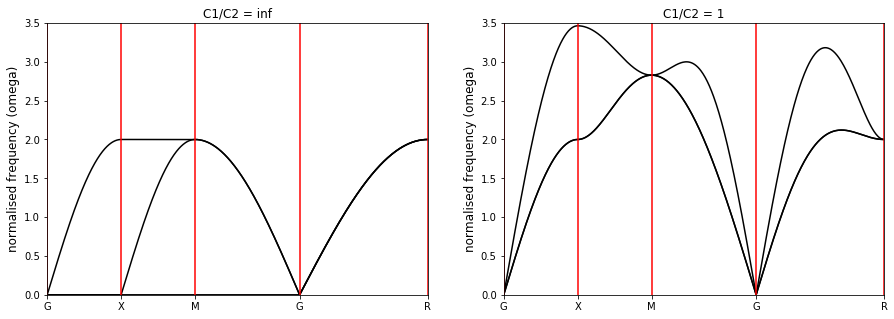

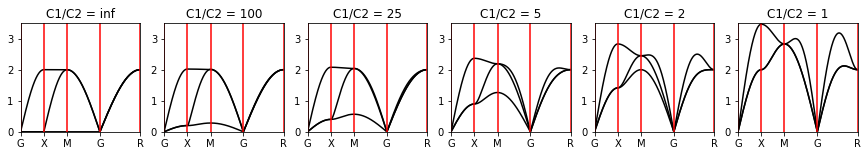

In [436]:
#plotting the dispersion relation at different C1/C2 values 
a, n = 1, 200
kk1, omega1 = dispersion_3d_symmetry(inf,a,n)
kk2, omega2 = dispersion_3d_symmetry(1,a,n)

fig, axs = plt.subplots(1, 2, figsize=[15,5])
create_fig(kk1, omega1, axs[0])
create_fig(kk2, omega2, axs[1])
axs[0].title.set_text('C1/C2 = inf')
axs[1].title.set_text('C1/C2 = 1')
axs[0].set_ylabel('normalised frequency (omega)', fontsize=12)
axs[1].set_ylabel('normalised frequency (omega)', fontsize=12)

c_quot_array = [inf, 100, 25, 5, 2, 1]
fig, axs = plt.subplots(1, 6, figsize=[15,2])
for i in range(6):
    kk_temp, omega_temp = dispersion_3d_symmetry(c_quot_array[i],a,n)
    create_fig(kk_temp, omega_temp, axs[i])
    axs[i].title.set_text('C1/C2 = ' + str(c_quot_array[i]))


**Density of states and specific heat**

We will use the dispersion relation of the 3-D simple cubic lattice where each atom interacts with its nearest and next nearest neighbours to calculate its [density of states](https://en.wikipedia.org/wiki/Density_of_states). We then use the density of states to calculate the specific heat of the crystal.

For 1-D, 2-D and 3-D lattices where atoms only interact with their immediate neighbours, the density of states can be calculated analytically. This, however, is not possible in the case where the nearest and next nearest neighbours interactions are taken into account. Instead, we approximate the density of states by choosing random values of the wavenumber k, in the first Brillouin zone. Then we calculate the angular frequency corresponding to these wavenumbers using the dispersion relation function *dispersion_3D()*. By creating a histogram in order to find the frequency of each obtained angular frequency, we are able to plot the density of states as a function of angular frequency, $\omega$.

We do this process for three cases:
1. $\frac{C_{1}}{C_{2}} = 1$ (nearest and next nearest neighbours have the same spring constant)
2. $\frac{C_{1}}{C_{2}} = 10$ (nearest neighbours has spring constant 10 times higher than next nearest neighbours)
3. $\frac{C_{1}}{C_{2}} = \infty$ (only nearest neighbours exert a force)

The density of states is then plotted as a function the normalised angular frequency, $\omega_{norm}$, where 

$$\omega_{norm} = \frac{\omega}{\sqrt{\frac{C_{1}}{M}}}$$



In [442]:
#function to calculate density of states. n_dos is the number of k values to sample, bins is the number of bins
#used for the histogram, c_quot is C1/C2 and a is the lattice constant. Returns density of states and omega
def density_of_states(n_dos, bins, c_quot, a):
    np.random.seed(0)
    #choosing random wavenumbers and calculating the frequency using the dispersion relation function
    k_rand = (2*pi/a)*(np.random.rand(3, n_dos)-0.5)
    omega_rand = dispersion_3D(k_rand,a,c_quot)

    #initialise arrays and find density of states
    ds = np.empty((1, bins))  #density of states
    wn = np.empty((1, bins))  #normalised angular frequency (omega_norm)
    ds, wn = np.histogram(omega_rand.reshape(n_dos*3), bins); #put data into histogram to find density of states
    ds = ds/n_dos*bins/(np.max(wn)-np.min(wn))*1/(a**3); #normalise density of states
    return [ 0.5*(wn[1:]+wn[:-1]), ds] #return the density of states and the centre of each bin (omega)

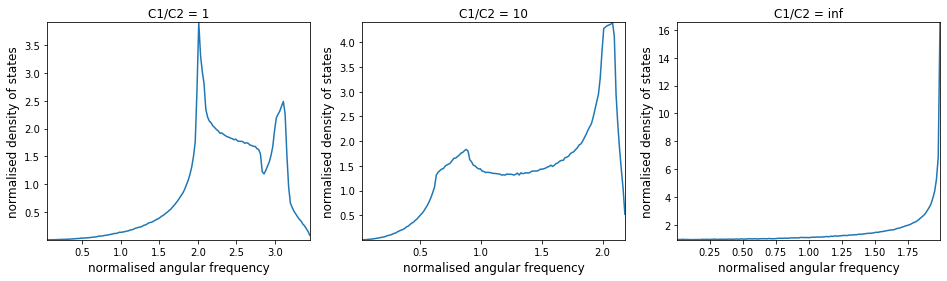

In [445]:
#plotting density of states for different c_quot values
n_dos, bins, a = 10**6, 150, 1
fig, axs = plt.subplots(1, 3, figsize=[16,4])
c_quot = [1, 10, inf]
for i in range(3):
    x = density_of_states(n_dos, bins, c_quot[i], a)
    axs[i].plot(x[0],x[1])
    axs[i].margins(0,0)
    axs[i].title.set_text('C1/C2 = ' + str(c_quot[i]))
    axs[i].set_xlabel('normalised angular frequency', fontsize=12)
    axs[i].set_ylabel('normalised density of states', fontsize=12)   

**Specific heat**

The specific heat can be calculated by differentiating the internal energy of the crystal with respect to temperature:

$$c_{v}=(\frac{\partial U}{\partial T})_{V,N}$$

Which can be expressed in terms of an integral over the frequency $\omega$:

$$c_{v} = \frac{\partial}{\partial T} \int d\omega \hbar \omega D(\omega) \frac{1}{e^{\frac{\hbar \omega}{k_{b}T}}-1}$$

If we assume the phonon density of state is independent of temperature, we have:

$$c_{v} =  \int d\omega \hbar \omega D(\omega) \frac{\partial}{\partial T}\frac{1}{e^{\frac{\hbar \omega}{k_{b}T}}-1}$$

Solving for

$$\frac{\partial}{\partial T}\frac{1}{e^{\frac{\hbar \omega}{k_{b}T}}-1}$$

We obtain

$$c_{v} =  \int (\frac{\hbar \omega}{T})^{2} \frac{D(\omega){e^{\frac{\hbar \omega}{k_{b}T}}}}{({e^{\frac{\hbar \omega}{k_{b}T}}-1})^{2}} $$

The integral is then solved numerically to obtain the specific heat as a function of temperature.

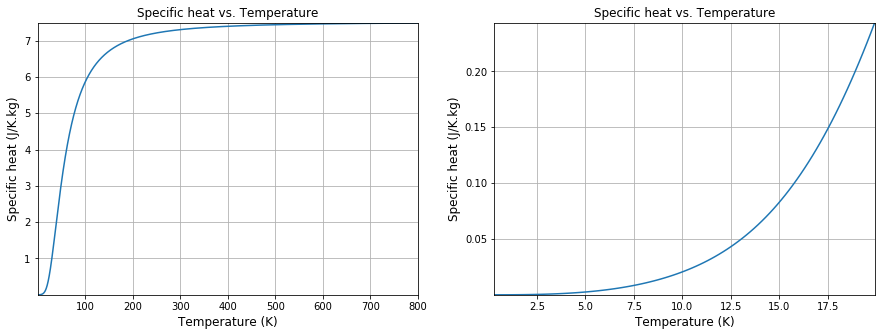

In [449]:
A, B = 10e10, 10e12   #A controls y-axis (cv) scale. B controls shape of specific heat curve
T_max = 800
iterations = 4000     
T = np.linspace(0.1, T_max, iterations)   #temperature in Kelvin
kb =  1.38e-23                            #Boltzmann constant
hbar = 1.05e-34                           #planck's constant
cv = np.empty((iterations))
x = density_of_states(n_dos, bins, 1, a)
omega, dos = x[0], x[1]
dos = A*dos                         
omega = B*omega
#numerical integration to calculate cv
for i in range(iterations):
    B = (hbar*omega)/(kb*T[i])
    I = (1/(np.exp(B)-1))*hbar*dos*omega
    cv[i] = integrate.trapz(omega, I)    
cv = -np.diff(cv)  

#plotting
fig, axs = plt.subplots(1, 2, figsize=[15,5])
axs[0].plot(T[1:None], cv)
axs[0].margins(0,0)
axs[0].grid()
axs[0].set_title('Specific heat vs. Temperature' )
axs[0].set_xlabel('Temperature (K)', fontsize=12)
axs[0].set_ylabel('Specific heat (J/K.kg)', fontsize=12)
axs[1].plot(T[1:100], cv[1:100])
axs[1].margins(0,0)
axs[1].grid()
axs[1].set_title('Specific heat vs. Temperature' )
axs[1].set_xlabel('Temperature (K)', fontsize=12)
axs[1].set_ylabel('Specific heat (J/K.kg)', fontsize=12);